In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/sample_data/spam.csv',encoding='latin1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# Steps:
#1. Data Cleaning
#2. EDA
#3. Text preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deployment

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#dropping the 3 columns with much missing values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.sample(5)

,v1,v2
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait..."
2700,ham,"Feb &lt;#&gt; is \I LOVE U\"" day. Send dis t..."
3683,ham,Dad says hurry the hell up
2037,ham,Oh sorry please its over


In [ ]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [ ]:
df.sample(5)

,target,text
2208,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...
1920,ham,Dont know you bring some food
1054,ham,HIYA COMIN 2 BRISTOL 1 ST WEEK IN APRIL. LES G...
2818,ham,Don't forget who owns you and who's private pr...
4950,ham,hi baby im sat on the bloody bus at the mo and...


In [ ]:
#encoding the target variable using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking for missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#checking for duplicate values
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

## 2. EDA

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


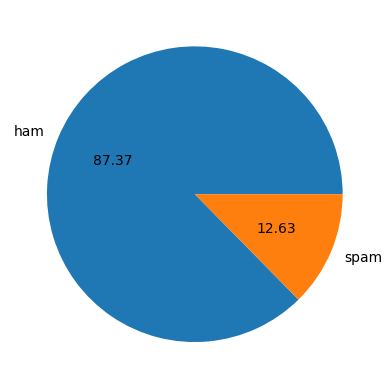

In [ ]:
# using pie chart to visualize the data points
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

The above chart shows that the data is imbalanced

## 3. Text Preprocessing

In [ ]:
#installing the NLTK library
!pip install nltk

In [ ]:
import nltk

In [ ]:
#import os
#os.environ['NLTK_DATA'] = 'C:/nltk_data'

In [ ]:
#nltk.data.path.append("C:/Users/DELL/nltk_data")  # Ensure this path exists
#nltk.download('punkt', download_dir="C:/Users/DELL/nltk_data")

In [ ]:
#nltk.data.path.append("C:/Users/DELL/nltk_data")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#extracting the length of the sentene
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#extracting the number of words using nltk
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#what is next do below

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#checking the descriptive statistics of the newly created features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# descriptive statistics for ham messages

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# descriptive statistics for spam messages

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

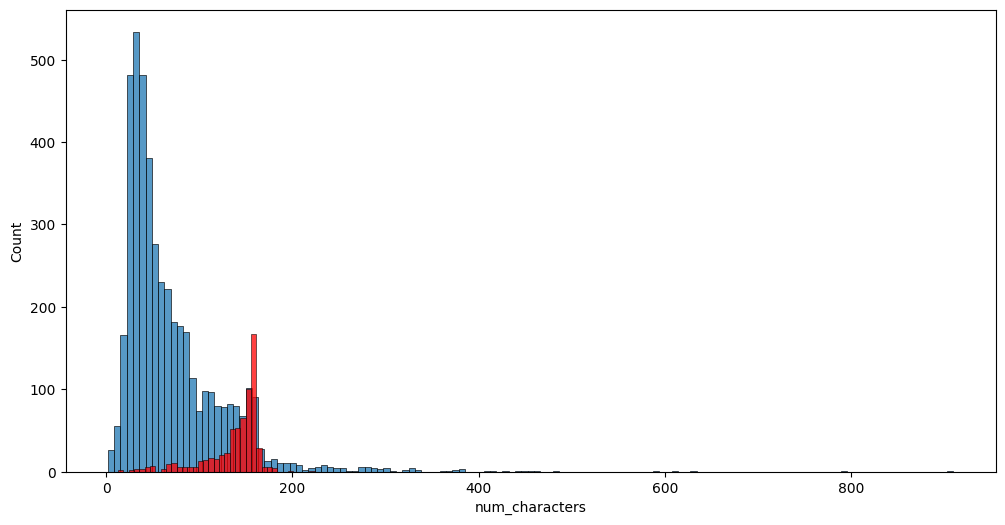

In [ ]:
#visualizing
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

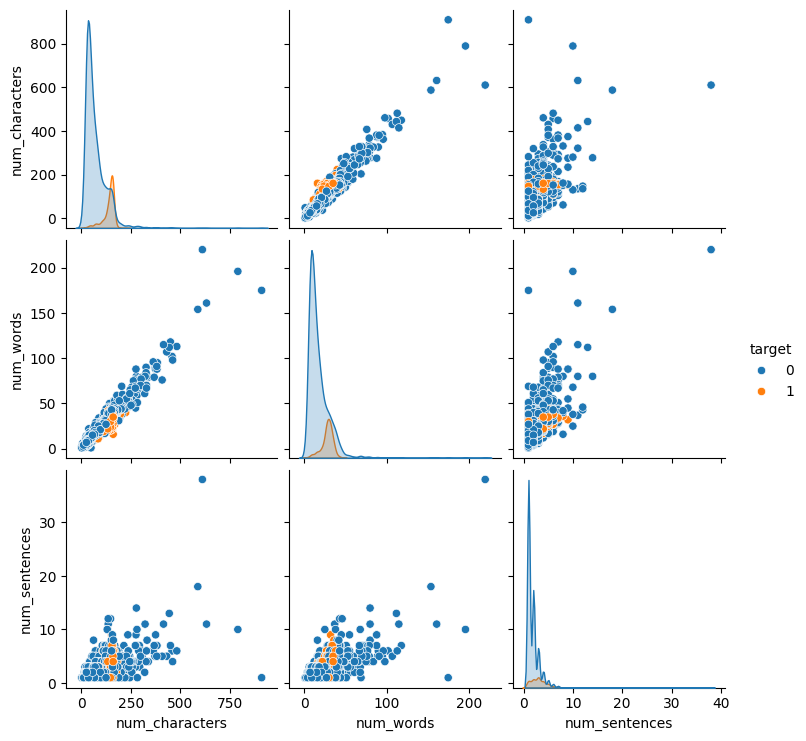

In [ ]:
#correlation analysis using pairplot
sns.pairplot(df,hue='target')

<Axes: >

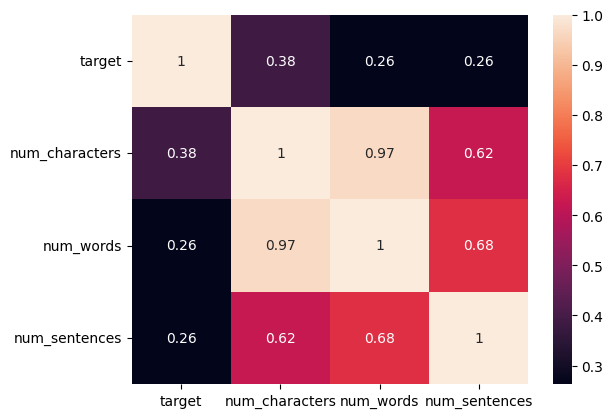

In [ ]:
#correlation with heatmap
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
#importing libraries for stopwords, stem
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stopwords.words('english')
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#creating a function that perform all text processing
def transform_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters (punctuation & special symbols)
    words = [word for word in words if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    string_punctuation = list(string.punctuation)
    filtered_words = [word for word in words if word not in stop_words and word not in string.punctuation]

    # Stemming
    stemmer = nltk.PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Return processed text as a tokenized list
    return " ".join(stemmed_words)


In [ ]:
transform_text('I loved the YT lecture on machine Learning How about you?')

'love yt lectur machin learn'

In [ ]:
#Applying the transform function on the dataset
df['text_transformed'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#using wordcloud to visualize the text
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='pink')

In [ ]:
#wordcloud of spam label
wc_spam = wc.generate(df[df['target']==1]['text_transformed'].str.cat(sep=" "))


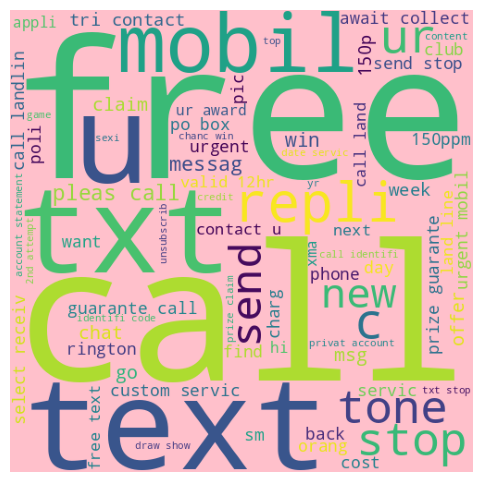

In [ ]:
# Display word cloud
plt.figure(figsize=(15,6))
plt.imshow(wc_spam)
plt.axis("off")
plt.show()

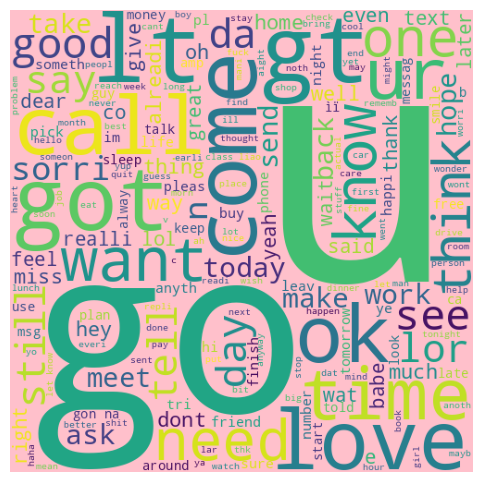

In [ ]:
#wordcloud for the ham text
wc_ham = wc.generate(df[df['target']==0]['text_transformed'].str.cat(sep=" "))

#plotting the wordcloud
plt.figure(figsize=(15,6))
plt.imshow(wc_ham)
plt.axis("off")
plt.show()

In [ ]:
#filtering the transformed text from the dataframe, trying to understand the word count for the spam
spam_corpus = []
for msg in df[df['target']==1]['text_transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [ ]:
from collections import Counter

sc = Counter(spam_corpus)
sc.most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
#converting to dataframe
sc_df = pd.DataFrame(sc.most_common(30))
sc_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


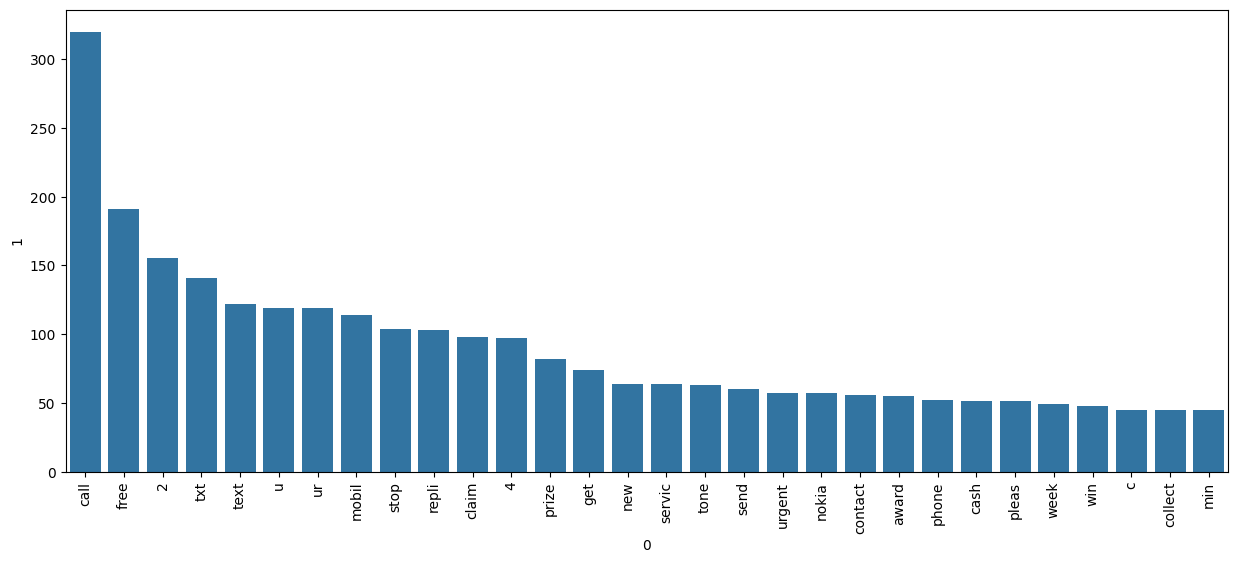

In [ ]:
#plotting a barchat
plt.figure(figsize=(15,6))
sns.barplot(x=sc_df[0],y=sc_df[1])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#filtering the transformed text from the dataframe, trying to understand the word count for the ham
ham_corpus = []
for msg in df[df['target']==0]['text_transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

In [ ]:
from collections import Counter

hc = Counter(ham_corpus)
hc.most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
#converting to dataframe
hc_df = pd.DataFrame(hc.most_common(30))
hc_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


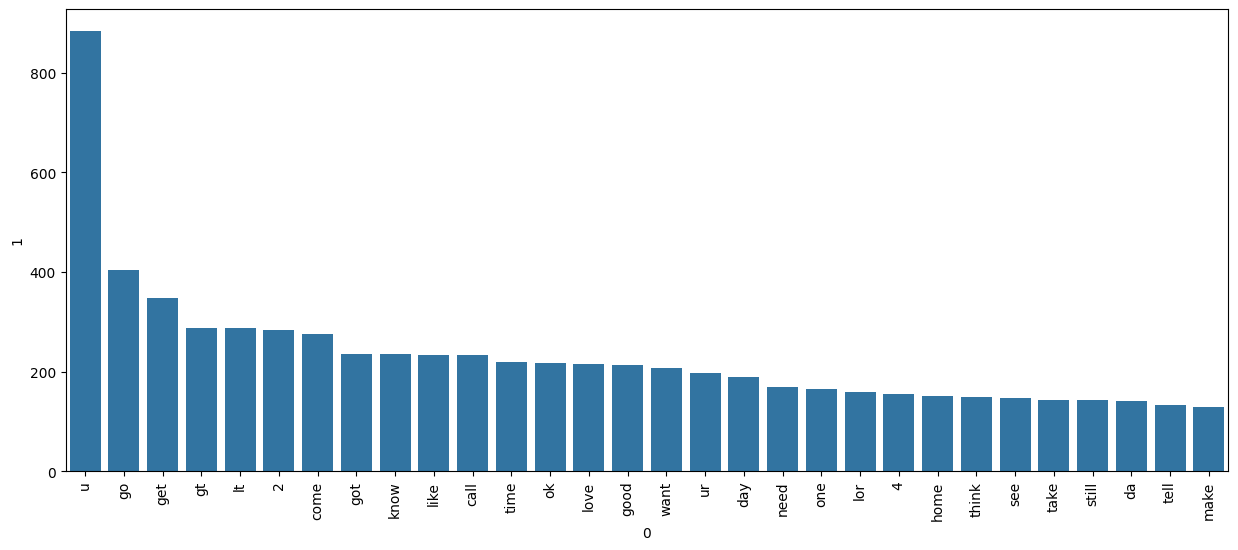

In [ ]:
#plotting a barchat
plt.figure(figsize=(15,6))
sns.barplot(x=hc_df[0],y=hc_df[1])
plt.xticks(rotation=90)
plt.show()

## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'text_transformed'],
      dtype='object')

In [ ]:
X = cv.fit_transform(df['text_transformed']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
df.shape

(5169, 6)

In [ ]:
# extracting the values of the target variable
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#spitting the X, y variables with model selection
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
#creating the object of the classes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#fitting the dataset into the gaussianNB model
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred1)}")
print(f"precision score is {precision_score(y_test, y_pred1)}")
print(f"recall score is {recall_score(y_test, y_pred1)}")
print(f"f1 score is {f1_score(y_test, y_pred1)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred1)}")


accuracy score is 0.8684719535783365
precision score is 0.5185185185185185
recall score is 0.8689655172413793
f1 score is 0.6494845360824743
confusion matrix is [[772 117]
 [ 19 126]]


In [ ]:
#fitting into multinomial model
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred2)}")
print(f"precision score is {precision_score(y_test, y_pred2)}")
print(f"recall score is {recall_score(y_test, y_pred2)}")
print(f"f1 score is {f1_score(y_test, y_pred2)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred2)}")


accuracy score is 0.9738878143133463
precision score is 0.8881578947368421
recall score is 0.9310344827586207
f1 score is 0.9090909090909091
confusion matrix is [[872  17]
 [ 10 135]]


In [ ]:
#fitting into bernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred3)}")
print(f"precision score is {precision_score(y_test, y_pred3)}")
print(f"recall score is {recall_score(y_test, y_pred3)}")
print(f"f1 score is {f1_score(y_test, y_pred3)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred3)}")

accuracy score is 0.8684719535783365
precision score is 0.5185185185185185
recall score is 0.8689655172413793
f1 score is 0.6494845360824743
confusion matrix is [[772 117]
 [ 19 126]]


In [ ]:
# using the TFIDfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [ ]:
X = tf.fit_transform(df['text_transformed']).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.shape

(5169,)

In [ ]:
y_train.shape

(4135,)

In [ ]:
y_test.shape

(1034,)

In [ ]:
#fitting the dataset into the gaussianNB model
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred1)}")
print(f"precision score is {precision_score(y_test, y_pred1)}")
print(f"recall score is {recall_score(y_test, y_pred1)}")
print(f"f1 score is {f1_score(y_test, y_pred1)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred1)}")

accuracy score is 0.8636363636363636
precision score is 0.5084033613445378
recall score is 0.8344827586206897
f1 score is 0.6318537859007833
confusion matrix is [[772 117]
 [ 24 121]]


In [ ]:
#fitting into multinomial model
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred2)}")
print(f"precision score is {precision_score(y_test, y_pred2)}")
print(f"recall score is {recall_score(y_test, y_pred2)}")
print(f"f1 score is {f1_score(y_test, y_pred2)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred2)}")

accuracy score is 0.9613152804642167
precision score is 0.9906542056074766
recall score is 0.7310344827586207
f1 score is 0.8412698412698413
confusion matrix is [[888   1]
 [ 39 106]]


In [ ]:
#fitting into bernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred3)}")
print(f"precision score is {precision_score(y_test, y_pred3)}")
print(f"recall score is {recall_score(y_test, y_pred3)}")
print(f"f1 score is {f1_score(y_test, y_pred3)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred3)}")

accuracy score is 0.8636363636363636
precision score is 0.5084033613445378
recall score is 0.8344827586206897
f1 score is 0.6318537859007833
confusion matrix is [[772 117]
 [ 24 121]]


## Note:
The problem statment determines which particular metrice we will use for evaluation.

1. If we want our model to focus only on the spam message and not by any chance predict those that are not spam to be spam, we should focus on *Precision*

2. If we want the model to predict more of spam and leaving non untouch, it might likely pick even the ones that are not spam we can go for *recall*.

3. Else we can consider both *Precision* and *Recall*

In this case we shall be considering both Precision and Recall, no biase

SO we'll also consider F1-score

Therefore: CounterVectorize --- > BNB


*Note Other Algorithmns can be tried to compare their scores*


In [ ]:
#training with othe algorithms, svm, random forest, decision tree, Kneighbors classifier, adaboost, catboost, Xgboost, gradientboost, xgboost, logistic regression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
ada = AdaBoostClassifier()
bc = BernoulliNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'AdaBoost' : ada,
    'Bernoulli' : bc,
    'Multinomial' : mnb,
    'Decision Tree' : dtc,
    'Random Forest' : rfc,
    'XGBoost' : xgb,
    'Logistic Regression' : lrc
}

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 6708), (1034, 6708), (4135,), (1034,))

In [ ]:
def classifier(clf, X_train, y_train, X_test, y_test):
    """Trains the classifier and returns performance metrics."""
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred, average='weighted')

    return acc, prec, rec#, f1


# Iterating through classifiers
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items():
    print(f"\nTraining Classifier: {name}")

    # Get the scores
    acc, prec, rec = classifier(clf, X_train, y_train, X_test, y_test)

    # Append scores
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    #f1_scores.append(f1)

    # Print results
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score: {rec:.4f}")
    #print(f"F1 Score: {f1:.4f}")


Training Classifier: SVC
Accuracy Score: 0.9720
Precision Score: 0.9394
Recall Score: 0.8552

Training Classifier: KN
Accuracy Score: 0.8965
Precision Score: 1.0000
Recall Score: 0.2621

Training Classifier: AdaBoost
Accuracy Score: 0.9149
Precision Score: 0.7879
Recall Score: 0.5379

Training Classifier: Bernoulli
Accuracy Score: 0.9662
Precision Score: 0.9661
Recall Score: 0.7862

Training Classifier: Multinomial
Accuracy Score: 0.9613
Precision Score: 0.9907
Recall Score: 0.7310

Training Classifier: Decision Tree
Accuracy Score: 0.9352
Precision Score: 0.8145
Recall Score: 0.6966

Training Classifier: Random Forest
Accuracy Score: 0.9700
Precision Score: 0.9914
Recall Score: 0.7931

Training Classifier: XGBoost
Accuracy Score: 0.9749
Precision Score: 0.9685
Recall Score: 0.8483

Training Classifier: Logistic Regression
Accuracy Score: 0.9439
Precision Score: 0.8655
Recall Score: 0.7103


In [ ]:
algorithms = []
for i in clfs.keys():
  algorithms.append(i)

In [ ]:
performance_df = pd.DataFrame({'Algorithms':algorithms, 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Recall':recall_scores})

In [ ]:
performance_df

,Algorithms,Accuracy,Precision,Recall
0,SVC,0.971954,0.939394,0.855172
1,KN,0.896518,1.000000,0.262069
2,AdaBoost,0.914894,0.787879,0.537931
3,Bernoulli,0.966151,0.966102,0.786207
4,Multinomial,0.961315,0.990654,0.731034
5,Decision Tree,0.935203,0.814516,0.696552
6,Random Forest,0.970019,0.991379,0.793103
7,XGBoost,0.974855,0.968504,0.848276
8,Logistic Regression,0.943907,0.865546,0.710345


In [ ]:
#melting the performance dataframe
performance_df1 = performance_df.melt(id_vars='Algorithms', var_name='Metrics', value_name='value')

In [ ]:
performance_df1

,Algorithms,Metrics,value
0,SVC,Accuracy,0.971954
1,KN,Accuracy,0.896518
2,AdaBoost,Accuracy,0.914894
3,Bernoulli,Accuracy,0.966151
4,Multinomial,Accuracy,0.961315
5,Decision Tree,Accuracy,0.935203
6,Random Forest,Accuracy,0.970019
7,XGBoost,Accuracy,0.974855
8,Logistic Regression,Accuracy,0.943907
9,SVC,Precision,0.939394


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'KN'),
  Text(2, 0, 'AdaBoost'),
  Text(3, 0, 'Bernoulli'),
  Text(4, 0, 'Multinomial'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'Random Forest'),
  Text(7, 0, 'XGBoost'),
  Text(8, 0, 'Logistic Regression')])

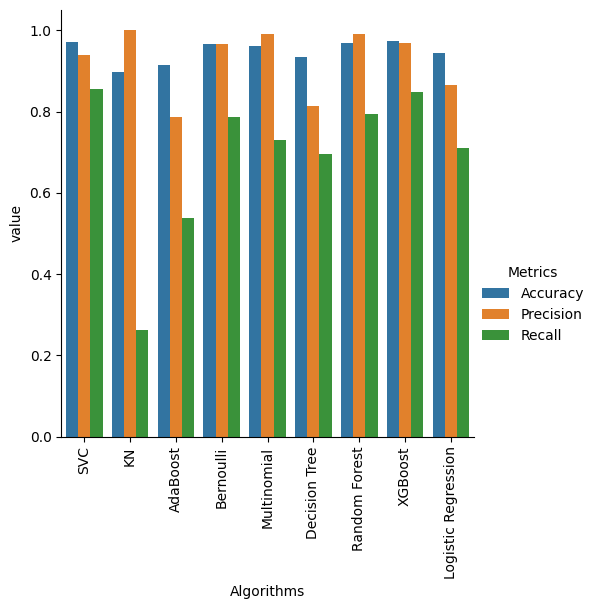

In [ ]:
#plotting the dataframe
sns.catplot(x='Algorithms', y='value', hue='Metrics', data=performance_df1, kind='bar')
plt.xticks(rotation=90)

#### improving the model performance
1. Changing the max_features of TfidfVectorizer to 3000
2. Scale the X variable
3. appending any of the other columns to the vectorized column
      appending the num_character column to X
      X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
4. applying voting classifier: i.e combining two or more best performing classifier

5. Applying stacking



In [ ]:
#Changing the max_features of TfidfVectorizer to 3000
tf2 = TfidfVectorizer( max_features=3000)

In [ ]:
X = tf2.fit_transform(df['text_transformed']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Iterating through classifiers
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
#f1_scores = []

for name, clf in clfs.items():
    print(f"\nTraining Classifier: {name}")

    # Get the scores
    acc, prec, rec = classifier(clf, X_train, y_train, X_test, y_test)

    # Append scores
    accuracy_scores2.append(acc)
    precision_scores2.append(prec)
    recall_scores2.append(rec)
    #f1_scores.append(f1)

    # Print results
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score: {rec:.4f}")
    #print(f"F1 Score: {f1:.4f}")


Training Classifier: SVC
Accuracy Score: 0.9768
Precision Score: 0.9549
Recall Score: 0.8759

Training Classifier: KN
Accuracy Score: 0.9062
Precision Score: 1.0000
Recall Score: 0.3310

Training Classifier: AdaBoost
Accuracy Score: 0.9159
Precision Score: 0.8085
Recall Score: 0.5241

Training Classifier: Bernoulli
Accuracy Score: 0.9729
Precision Score: 0.9606
Recall Score: 0.8414

Training Classifier: Multinomial
Accuracy Score: 0.9729
Precision Score: 0.9916
Recall Score: 0.8138

Training Classifier: Decision Tree
Accuracy Score: 0.9342
Precision Score: 0.8348
Recall Score: 0.6621

Training Classifier: Random Forest
Accuracy Score: 0.9720
Precision Score: 0.9754
Recall Score: 0.8207

Training Classifier: XGBoost
Accuracy Score: 0.9681
Precision Score: 0.9375
Recall Score: 0.8276

Training Classifier: Logistic Regression
Accuracy Score: 0.9468
Precision Score: 0.8689
Recall Score: 0.7310


In [ ]:
performance_tf2 = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy':accuracy_scores2, 'Precision':precision_scores2, 'Recall':recall_scores2})

In [ ]:
merged_df = pd.merge(performance_df, performance_tf2, on='Algorithms')

In [ ]:
merged_df

,Algorithms,Accuracy_x,Precision_x,Recall_x,Accuracy_y,Precision_y,Recall_y
0,SVC,0.971954,0.939394,0.855172,0.976789,0.954887,0.875862
1,KN,0.896518,1.000000,0.262069,0.906190,1.000000,0.331034
2,AdaBoost,0.914894,0.787879,0.537931,0.915861,0.808511,0.524138
3,Bernoulli,0.966151,0.966102,0.786207,0.972921,0.960630,0.841379
4,Multinomial,0.961315,0.990654,0.731034,0.972921,0.991597,0.813793
5,Decision Tree,0.935203,0.814516,0.696552,0.934236,0.834783,0.662069
6,Random Forest,0.970019,0.991379,0.793103,0.971954,0.975410,0.820690
7,XGBoost,0.974855,0.968504,0.848276,0.968085,0.937500,0.827586
8,Logistic Regression,0.943907,0.865546,0.710345,0.946809,0.868852,0.731034


In [ ]:
#applying voting classifier

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('bnb', bc), ('mnb', mnb), ('rfc', rfc), ('xgb', xgb)], voting='hard')

In [ ]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"precision score is {precision_score(y_test, y_pred)}")
print(f"recall score is {recall_score(y_test, y_pred)}")
print(f"f1 score is {f1_score(y_test, y_pred)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred)}")

accuracy score is 0.971953578336557
precision score is 0.9915254237288136
recall score is 0.8068965517241379
f1 score is 0.8897338403041825
confusion matrix is [[888   1]
 [ 28 117]]


In [ ]:
voting = VotingClassifier(estimators=[('bnb', bc), ('mnb', mnb), ('rfc', rfc), ('xgb', xgb), ('svc', svc)], voting='hard')

In [ ]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"precision score is {precision_score(y_test, y_pred)}")
print(f"recall score is {recall_score(y_test, y_pred)}")
print(f"f1 score is {f1_score(y_test, y_pred)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred)}")

accuracy score is 0.9787234042553191
precision score is 0.992
recall score is 0.8551724137931035
f1 score is 0.9185185185185185
confusion matrix is [[888   1]
 [ 21 124]]


Note: The Voting esemble model is performing well with **TfidfVectorizer**



In [ ]:
#applying stacking classifier
estimators_ = [('bnb', bc), ('mnb', mnb), ('rfc', rfc), ('xgb', xgb), ('svc', svc)]
super_estimator = RandomForestClassifier()


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stacking_clf = StackingClassifier(estimators=estimators_, final_estimator=super_estimator)

In [ ]:
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"precision score is {precision_score(y_test, y_pred)}")
print(f"recall score is {recall_score(y_test, y_pred)}")

accuracy score is 0.9825918762088974
precision score is 0.950354609929078
recall score is 0.9241379310344827


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.95      0.92      0.94       145

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
#pickling the TfidfVectorizer
import pickle
pickle.dump(tf2, open('vectorizer.pkl', 'wb'))

#picking the voting model
pickle.dump(voting, open('model.pkl', 'wb'))